In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set_theme()
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### 1. Load Data
#### Read the “housing.csv” file from the folder into the program.
#### Print first few rows of this data.
#### Extract input(X) and output(Y) data from the dataset. It will be implemented after EDA in Section 4 Split the dataset

In [2]:
df_house=pd.read_excel("1553768847_housing.xlsx")

In [3]:
print(df_house.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [4]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
df_house.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [6]:
df_house.shape

(20640, 10)

In [7]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
print("The number of rows and colums are {} and also called shape of the matrix".format(df_house.shape))
print("Columns names are \n {}".format(df_house.columns))

The number of rows and colums are (20640, 10) and also called shape of the matrix
Columns names are 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


### 2. Handle missing values
#### Fill the missing values with the mean of the respective column.

In [10]:
# Let's check if there are any missing values or null
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [11]:
df_house.total_bedrooms

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [12]:
# We see that there are 207 null values in Column total_bedrooms. 
# So,We replace the null values with the mean and check for nulls again.
df_house.total_bedrooms=df_house.total_bedrooms.fillna(df_house.total_bedrooms.mean())
# We could also fill total_bedrooms column with the median. Like
# df_house['total_bedrooms'].fillna(df_house['total_bedrooms'].median(),inplace=True)

In [13]:
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### 3. Encode categorical data :
#### Convert categorical column in the dataset to numerical data

In [14]:
print(df_house.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object


In [15]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [16]:
df_house.ocean_proximity.nunique()

5

In [17]:
df_house.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [18]:
print(df_house["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [32]:
# One of the column is a categorical feature (ocean_proximity)
# Applying One hot encoding for categorical feature (ocean_proximity)
new_data = pd.concat([df_house, pd.get_dummies(df_house['ocean_proximity'])],axis=1)

In [34]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
 10  <1H OCEAN           20640 non-null  uint8  
 11  INLAND              20640 non-null  uint8  
 12  ISLAND              20640 non-null  uint8  
 13  NEAR BAY            20640 non-null  uint8  
 14  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(4), int64(5), object(1), uint8(5)
memory u

In [35]:
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,0,0,0,1,0


In [36]:
new_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
new_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [38]:
df_house.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [39]:
new_data.drop(['ocean_proximity'],axis=1,inplace=True)

### 4. Split the dataset :
#### Split the data into 80% training dataset and 20% test dataset.
### 5. Standardize data :
#### Standardize training and test datasets
### 6. Perform Linear Regression :
#### Perform Linear Regression on training data.
#### Predict output for test dataset using the fitted model.
#### Print root mean squared error (RMSE) from Linear Regression.

In [48]:
# Extracting input(X) as X_Features and output(Y) as 
X_Features=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
Y_Target=['median_house_value']
X=df_house[X_Features]
Y=df_house[Y_Target]

In [49]:
from sklearn.preprocessing import StandardScaler

In [79]:
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not 
# transform the dependent variables.

scaler = StandardScaler()
X_s= scaler.fit_transform(X)
Y_s= scaler.fit_transform(Y)

In [61]:
x_train, x_test, y_train, y_test = train_test_split( X_s, Y_s, test_size=0.20, random_state=25)

In [62]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred=lr.predict(x_test)

In [68]:
mean_squared_error(y_test, y_pred)

0.3516589188045502

In [69]:
r2_score(y_test, y_pred)

0.6381154799115751

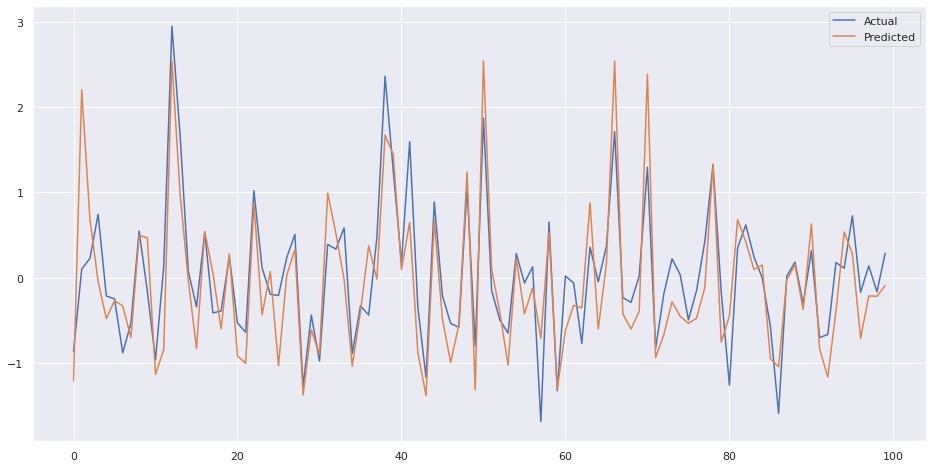

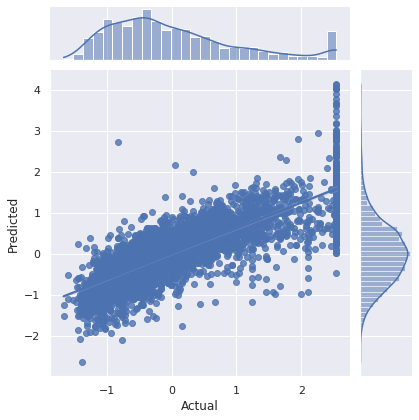

In [78]:
test = pd.DataFrame({'Predicted':y_pred.flatten(),'Actual':y_test.flatten()})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [81]:
min_scalar = MinMaxScaler()

In [84]:
X_m=min_scalar.fit_transform(X)
Y_m=min_scalar.fit_transform(Y)

In [86]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split( X_m, Y_m, test_size=0.20, random_state=111)

In [87]:
lr_m = LinearRegression()

In [89]:
lr_m.fit(x_train_m,y_train_m)

LinearRegression()

In [91]:
y_pred_m = lr_m.predict(x_test_m)

In [92]:
mean_squared_error(y_test_m, y_pred_m)

0.020960317065782705

In [93]:
r2_score(y_test_m, y_pred_m)

0.6316343155163644

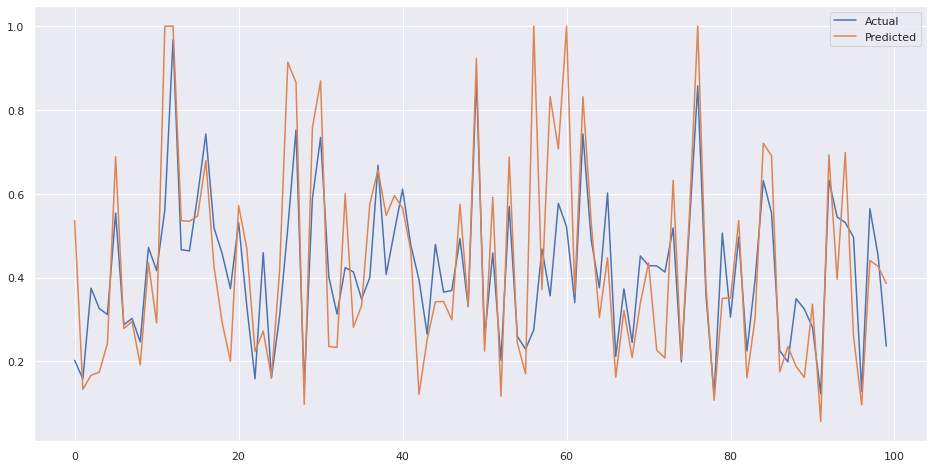

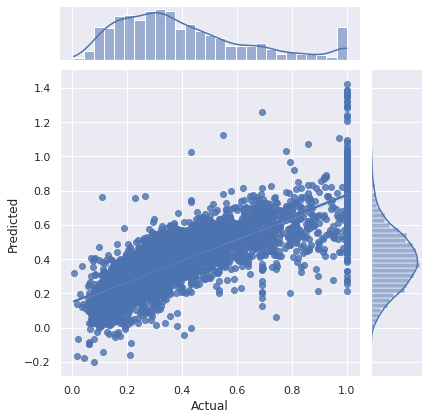

In [97]:
test = pd.DataFrame({'Predicted':y_pred_m.flatten(),'Actual':y_test_m.flatten()})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

### 7. Perform Linear Regression with one independent variable :
#### Extract just the median_income column from the independent variables (from X_train and X_test).
#### Perform Linear Regression to predict housing values based on median_income.
#### Predict output for test dataset using the fitted model.
#### Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [106]:
X_med=new_data['median_income'].values.reshape(-1,1)
Y_med=new_data['median_house_value'].values.reshape(-1,1)

In [115]:
x_train_med, x_test_med, y_train_med, y_test_med = train_test_split( X_med, Y_med, test_size=0.20, random_state=111)

In [116]:
lr_med = LinearRegression()

In [117]:
lr_med.fit(x_train_med,y_train_med)

LinearRegression()

In [ ]:
y_pred_med=lr_med.predict(x_test_med)

In [ ]:
mean_squared_error(y_test_med,y_pred_med)

7282634839.897113

In [ ]:
r2_score(y_test_med,y_pred_med)

0.45589490363154994